# Figure 1
- Multipanel biogeochem figure with site map
- Make one with regression stats and one with correlation stats
- Update: panel D needs to be polynomial. also compare linear vs. polynomial regressions
- Update: panel A needed to be breakpoint regression

## Setup

In [5]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(ggmap)))
suppressMessages(suppressWarnings(library(ggsn)))
suppressMessages(suppressWarnings(library(cowplot)))
suppressMessages(suppressWarnings(library(car)))
suppressMessages(suppressWarnings(library(lmodel2)))
suppressMessages(suppressWarnings(library(mvnTest)))
suppressMessages(suppressWarnings(library(segmented)))
`%notin%` <- Negate(`%in%`)

In [6]:
# Colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep = '\t', header = T, row.names = 1) %>%
    set_names(c('color','Location'))
# site_colors

# Metadata
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep = "\t", header = TRUE) %>%
    mutate(Location = factor(Location, levels = rownames(site_colors))) %>%
    mutate(CH4_logn1 = log10(CH4_ug_m2_h - (1.05*min(CH4_ug_m2_h)))) %>%
    mutate(CO2_logn1 = log10(CO2_mg_m2_h - (1.05*min(CO2_mg_m2_h))))

# Subset to just D1 for methane flux (flux values are per core, not split by depth. in metaDB D1 = D2).
metaDB1 <- subset(metaDB, Depth == "d1")

# Mayberry (for panel C stats)
Mayberry = subset(metaDB1, Location == "Mayberry")

# Geographic coordinates
coords <- read.csv("../data/meta/Coords.csv") %>%
    left_join(., site_colors, by = "Location") %>%
    mutate(Location = factor(Location,
                             levels = c("Sandmound", "WestPond", "Mayberry", "Browns", "RushRanch", "Joice", "Goodyear", "WhiteSlough",
                                        "Tolay", "ChinaCamp", "Muzzi")))
# coords

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `CO2_logn1 = log10(CO2_mg_m2_h - (1.05 * min(CO2_mg_m2_h)))`.
Caused by warning:
! NaNs produced”


## Regression stats

In [7]:
print('Log CH4, Salinity - Linear')
m1 <- lm(CH4_logn1 ~ Salinity.x, data = metaDB1)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Salinity - Polynomial')
m2 <- lm(CH4_logn1 ~ poly(Salinity.x, 2), data = metaDB1)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('Log CH4, Log CO2')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = metaDB1)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Log CO2 - Mayberry Only')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = subset(metaDB1, Location == "Mayberry"))
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('C, Salinity - Linear')
m1 <- lm(C ~ Salinity.x, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('C, Salinity - Polynomail')
m2 <- lm(C ~ poly(Salinity.x, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('N:P, C - Linear')
m1 <- lm(NP ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('N:P, C - Polynomial')
m2 <- lm(NP ~ poly(C, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('NH4, C - Linear')
m1 <- lm(NH4_N ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('NH4, C - Polynomial')
m2 <- lm(NH4_N ~ poly(C, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

[1] "Log CH4, Salinity - Linear"


[1] 0.15

[1] 0.0002301674

[1] "Log CH4, Salinity - Polynomial"


[1] 0.18

[1] 0.0001977739

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,83,82.64004,NA,NA,NA,NA
2,82,79.73358,1,2.906461,2.989077,0.08759132


[1] "Log CH4, Log CO2"


[1] 0.25

[1] 1.95701e-06

[1] "Log CH4, Log CO2 - Mayberry Only"


[1] 0.88

[1] 8.07447e-09

[1] "C, Salinity - Linear"


[1] 0.27

[1] 3.835379e-13

[1] "C, Salinity - Polynomail"


[1] 0.39

[1] 6.761804e-15

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,12403.42,NA,NA,NA,NA
2,167,10438.75,1,1964.662,31.43082,8.390588e-08


[1] "N:P, C - Linear"


[1] 0.78

[1] 1.300358e-57

[1] "N:P, C - Polynomial"


[1] 0.86

[1] 1.196661e-69

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,4032.380,NA,NA,NA,NA
2,167,2655.759,1,1376.621,86.56499,7.479095e-17


[1] "NH4, C - Linear"


[1] 0.65

[1] 1.227334e-40

[1] "NH4, C - Polynomial"


[1] 0.71

[1] 1.751725e-44

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,124431.2,NA,NA,NA,NA
2,167,105339.9,1,19091.33,30.26632,1.392185e-07


## Regression stats - modell II regression

            Doornik-Hansen test for Multivariate Normality 

  data : data 

  DH              : 41.08516 
  p-value         : 2.580889e-08 

  Result  : Data are not multivariate normal (sig.level = 0.05) 


Model II regression

Call: lmodel2(formula = CH4_logn1 ~ Salinity.x, data = metaDB1, range.y
= "interval", range.x = "relative", nperm = 1000)

n = 85   r = -0.389393   r-square = 0.1516269 
Parametric P-values:   2-tailed = 0.0002301674    1-tailed = 0.0001150837 
Angle between the two OLS regression lines = 9.513873 degrees

Permutation tests of OLS, MA, RMA slopes: 1-tailed, tail corresponding to sign
A permutation test of r is equivalent to a permutation test of the OLS slope
P-perm for SMA = NA because the SMA slope cannot be tested

Regression results
  Method Intercept       Slope Angle (degrees) P-perm (1-tailed)
1    OLS  1.174321 -0.03013244       -1.725939       0.000999001
2     MA  1.176327 -0.03028616       -1.734739       0.000999001
3    SMA  1.791030 -0.07738311       -4.424907                NA
4    RMA  1.718064 -0.07179263       -4.106370       0.000999001

Confidence intervals
  Method 2.5%-Intercept 97.5%-Intercept  2.5%-Slope 97.5%-Slope
1    OLS       0.878371 

[1] 0.1516269

[1] 0.0002301674

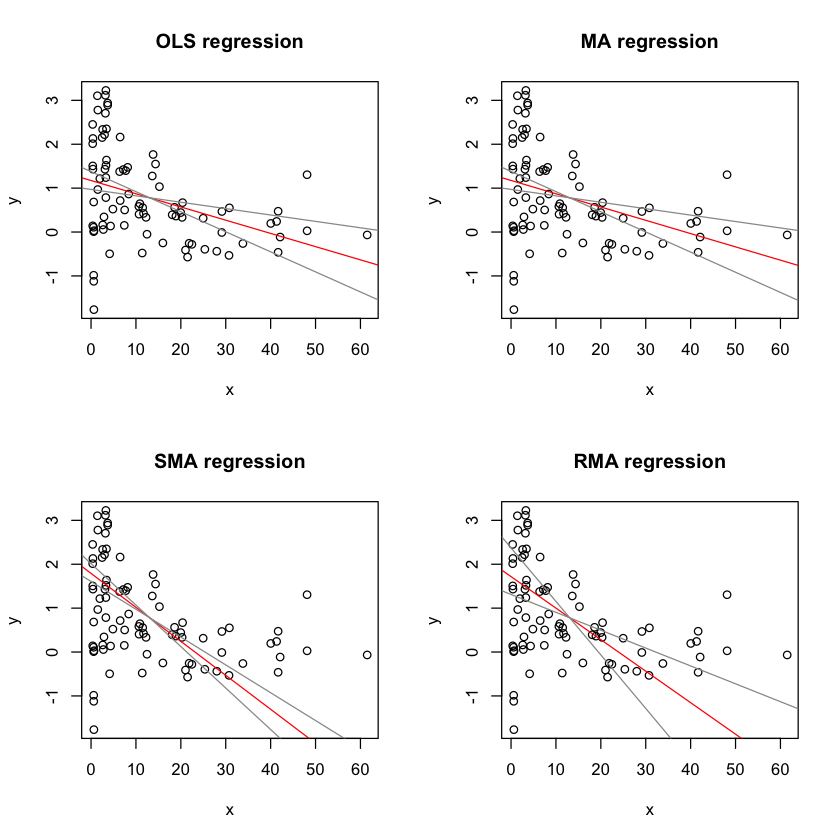

In [8]:
# Explore using model II regression in the lmodel2 package to take into account measurement error in the x variable
# One could argue it is more suitable in this case because the x variable is measured, not controlled
# However, Legendre and Legendre 2012 suggest OLS when distribution is not bivariate normal
# Test for bivariate normal distribution
data <- metaDB1 %>%
    dplyr::select(CH4_logn1, Salinity.x)
DH.test(data, qqplot = FALSE)

# Model II regression
modA <- lmodel2(CH4_logn1 ~ Salinity.x, data = metaDB1, nperm = 1000, range.x = "relative", range.y = "interval")
modA
modA$rsquare
modA$P.param
op <- par(mfrow = c(2,2))
plot(modA, "OLS")
plot(modA, "MA")
plot(modA, "SMA")
plot(modA, "RMA")
par(op)

##  Regression stats - breakpoint regression

In [20]:
# Get max salinity in Delta
Delta <- metaDB1 %>%
    filter(Location %in% c("Sandmound", "Mayberry", "WestPond", "Browns"))
max(Delta$Salinity.x)

# Get min salinity outside of Delta
Bay <- metaDB1 %>%
    filter(Location %notin% c("Sandmound", "Mayberry", "WestPond", "Browns"))
min(Bay$Salinity.x)

[1] 4.865337

[1] 6.368166


	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = fit, seg.Z = ~Salinity.x, psi = 5)

Estimated Break-Point(s):
                  Est. St.Err
psi1.Salinity.x 1.416  2.871

Meaningful coefficients of the linear terms:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)     0.2702     1.2554   0.215    0.830
Salinity.x      0.7443     2.4344   0.306    0.761
U1.Salinity.x  -0.7816     2.4344  -0.321       NA

Residual standard error: 0.9799 on 81 degrees of freedom
Multiple R-Squared: 0.2016,  Adjusted R-squared: 0.172 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 2 iterations (rel. change -2.6016e-08)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,84,97.41002,NA,NA,NA,NA
2,81,77.77450,3,19.63551,6.816615,0.0003734908


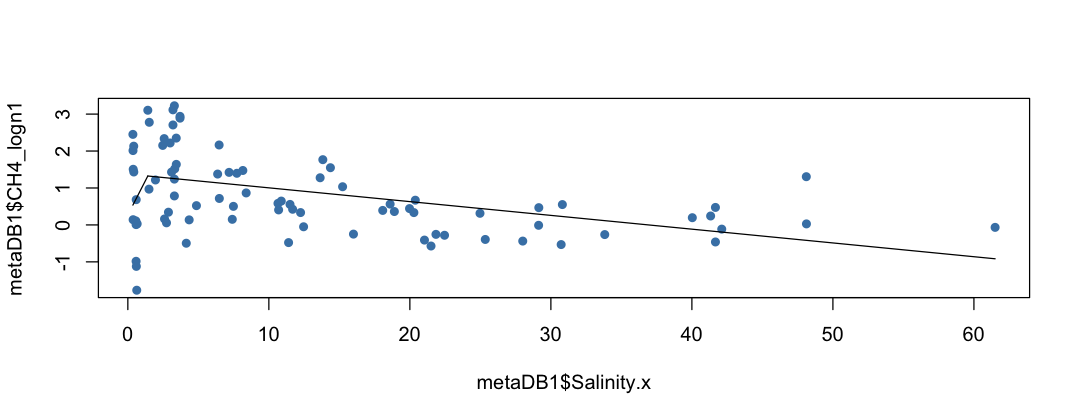

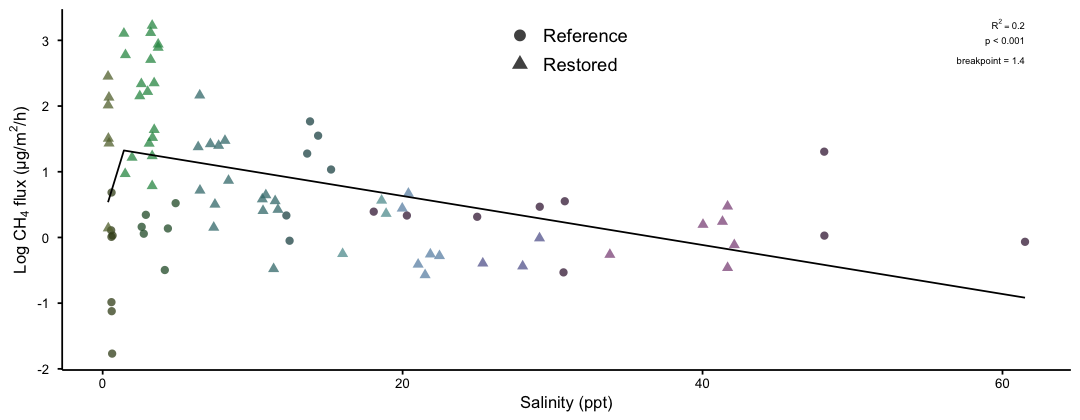

In [38]:
# fit simple linear regression model
fit <- lm(CH4_logn1 ~ Salinity.x, data = metaDB1)

# fit piecewise regression model to original model, estimating a breakpoint at x=9
segmented.fit <- segmented(fit, seg.Z = ~Salinity.x, psi = 5)

# view summary of segmented model
summary(segmented.fit)

# get p-value
null.mod <- lm(CH4_logn1 ~ 1, data = metaDB1)
anova(null.mod, segmented.fit)

# plot original data
plot(metaDB1$Salinity.x, metaDB1$CH4_logn1, pch = 16, col = 'steelblue')

# add segmented regression model
plot(segmented.fit, add = T)

# add fit to data frame
metaDB1$segfit <- broken.line(segmented.fit)$fit

# make panel a
a <- ggplot(metaDB1, aes(Salinity.x, CH4_logn1, colour = Location)) +
  geom_point(size = 2, alpha = 0.75, aes(shape = EWcoastGroup)) +
  geom_line(aes(Salinity.x, segfit), inherit.aes = F, size = 0.5, color = "black") +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 2, label = "R^2 == 0.20"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 5, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 8, label = "breakpoint = 1.4"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = expression("Log "*CH[4]*" flux (µg/"*m^2*"/h)"),
       shape = NULL) +
  scale_colour_manual(values = site_colors$color) +
  scale_shape_manual(values = c(16, 17), labels = c("Reference", "Restored")) +
  #scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
  #              labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  #annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  guides(colour = "none",
         shape = guide_legend(override.aes = list(size = 3))) +
  theme_classic() +
  theme(legend.position = c(0.5, 0.9),
        legend.text = element_text(size = 11, color = "black"), 
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))
a

## Figure

In [9]:
head(metaDB1, n = 20)

,X,EWsiteHyd_index,Sample,MG_name,Index,Location,Pl_Sp,EWcoastGroup,SALTgroup,LU,⋯,Na_pw,K_pw,Ca_pw,Mn_pw,Mg_pw,Fe_pw,Cu_pw,Zn_pw,CH4_logn1,CO2_logn1
,<int>,<int>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,Sandmound_TuleA_D1,Sandmound_TuleA_D1,2,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0.684078700,-0.01172670
3,2,3,Sandmound_TuleB_D1,Sandmound_TuleB_D1,3,Sandmound,Tule,SF_Ref,FW,Ref,⋯,96669.10,NA,59069.71,1175.01,26016.80,624.42,1.35,NA,-1.122287284,0.56415584
5,4,5,Sandmound_TuleC_D1,Sandmound_TuleC_D1,4,Sandmound,Tule,SF_Ref,FW,Ref,⋯,238099.57,371.64,77352.15,3033.70,51492.04,3796.41,4.77,NA,0.108660818,0.09926740
7,6,7,Sandmound_CattailA_D1,NA,1,Sandmound,Cattail,SF_Ref,FW,Ref,⋯,105517.92,2592.95,47456.79,577.28,27486.62,424.33,1.74,NA,-0.984812122,0.34306161
9,8,9,Sandmound_ThreeSqA_D1,NA,5,Sandmound,ThreeSq,SF_Ref,FW,Ref,⋯,144427.16,NA,49568.66,124.17,25688.29,320.11,3.16,NA,0.029752534,0.53729587
11,10,10,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D1,6,Sandmound,ThreeSq,SF_Ref,FW,Ref,⋯,103955.03,NA,48449.61,576.19,21267.82,2565.08,1.42,NA,0.008654096,0.32974992
13,12,12,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D1,7,Sandmound,ThreeSq,SF_Ref,FW,Ref,⋯,181577.27,NA,56285.76,385.36,33854.91,271.27,3.45,NA,-1.767851993,0.65523897
15,14,14,WestPond_TuleA_D1,WestPond_TuleA_D1,8,WestPond,Tule,SF_Rest,FW,West,⋯,67222.29,1141.02,45960.11,0.90,20835.52,80.48,0.89,NA,2.451151650,1.37745222
17,16,16,WestPond_TuleB_D1,WestPond_TuleB_D1,9,WestPond,Tule,SF_Rest,FW,West,⋯,57146.00,5081.79,37792.07,50.30,15183.38,49.43,0.50,NA,1.506151346,0.96708670


In [10]:
head(metaDB$Salinity.x, n = 20)

[1] 0.5934254 0.5934254 0.6026209 0.6026209 0.5664683 0.5664683 0.5847625
 [8] 0.5847625 0.6615649 0.6615649 0.5847625 0.5847625 0.6314362 0.6314362
[15] 0.3580554 0.3580554 0.3802442 0.3802442 0.3744603 0.3744603

In [11]:
head(metaDB$CH4_ug_m2_h, n = 20)

[1]   4.4730640   4.4730640  -0.2829401  -0.2829401   0.9258838   0.9258838
 [7]  -0.2548404  -0.2548404   0.7125095   0.7125095   0.6617272   0.6617272
[13]  -0.3413328  -0.3413328 282.2282567 282.2282567  31.7154692  31.7154692
[19]   1.0261373   1.0261373

In [12]:
head(metaDB$CO2_mg_m2_h, n = 20)

[1]  1.481020  1.481020  4.173351  4.173351  1.764464  1.764464  2.710899
 [8]  2.710899  3.953506  3.953506  2.644392  2.644392  5.028707  5.028707
[15] 24.355674 24.355674  9.777809  9.777809  4.630644  4.630644

In [13]:
head(metaDB$C, n = 20)

[1] 14.90 14.98 15.15 13.59 16.45 13.27 16.76 20.65 17.01 17.79 15.41 16.23
[13] 16.62 15.95 43.40 34.88 38.44 32.85 40.59 40.03

In [14]:
head(metaDB$NP, n = 20)

[1] 22.70859 23.71030 21.87199 22.67834 21.39552 24.48065 26.60498 31.70451
 [9] 25.31504 25.24387 24.62400 23.76590 25.93497 23.01581 41.59744 28.48704
[17] 40.29304 32.90118 39.78538 33.93986

In [15]:
head(metaDB$NH4_N, n = 20)

[1]  33.42  48.13  28.59  35.32  30.00  21.19  44.82  33.55  73.76  85.49
[11]  42.90  29.48  49.32  47.43 225.21  67.11 115.64  75.99 130.39 101.27

In [16]:
cor.test(metaDB$NO3_NH4, metaDB$CH4_logn1)


	Pearson's product-moment correlation

data:  metaDB$NO3_NH4 and metaDB$CH4_logn1
t = -2.5424, df = 138, p-value = 0.01211
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.36463182 -0.04728032
sample estimates:
       cor 
-0.2115244 


### Panels a and c need to use metaDB1. Panels d, e, f need to use metaDB.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


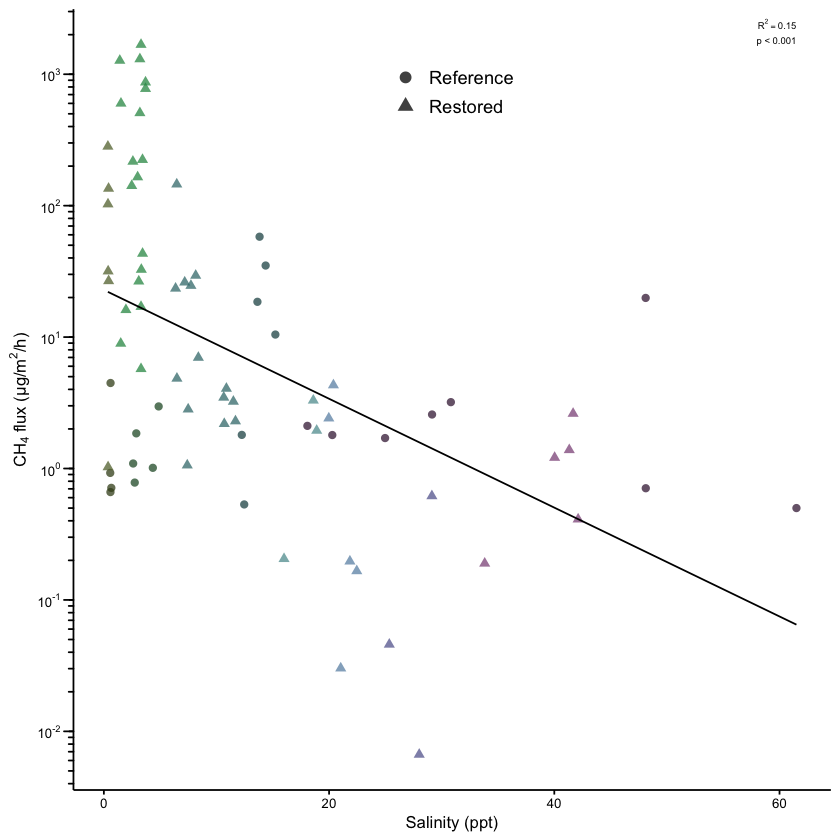

In [17]:
a <- ggplot(metaDB1, aes(Salinity.x, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.75, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(Salinity.x, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 2, label = "R^2 == 0.15"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 5, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)"),
       shape = NULL) +
  scale_colour_manual(values = site_colors$color) +
  scale_shape_manual(values = c(16, 17), labels = c("Reference", "Restored")) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  guides(colour = "none",
         shape = guide_legend(override.aes = list(size = 3))) +
  theme_classic() +
  theme(legend.position = c(0.5, 0.9),
        legend.text = element_text(size = 11, color = "black"), 
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))
a

ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.



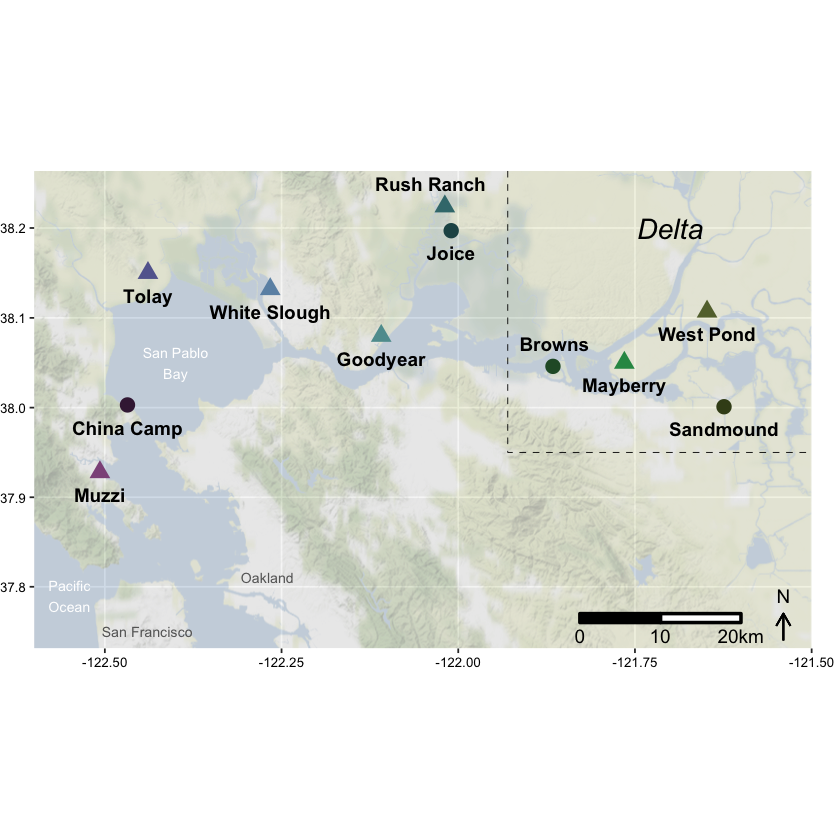

In [30]:
# Map with ggmap
adjust = c("RushRanch", "Browns")
coords1 <- subset(coords, Location %notin% adjust)
coords2 <- subset(coords, Location == "RushRanch")
coords3 <- subset(coords, Location == "Browns")

# Map
sfbay <- get_stamenmap(bbox = c(left = -122.6, 
                                bottom = 37.730988, 
                                right = -121.5, 
                                top = 38.263536),
                           zoom = 10, 
                           maptype = "terrain-background")
sfbay_attributes <- attributes(sfbay)
sfbay_transparent <- matrix(adjustcolor(sfbay, alpha.f = 0.4), nrow = nrow(sfbay))
attributes(sfbay_transparent) <- sfbay_attributes

path <- data.frame(x = c(-121.93, -121.93, -121.50),
                   y = c(38.263536, 37.95, 37.95))
b <- ggmap(sfbay_transparent) + # the base map
  geom_point(data = coords,
             aes(x = longitude, y = latitude, colour = Location, shape = Status), size =  4) +
  geom_text(data = coords1, aes(x = longitude, y = latitude - 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords2, aes(x = longitude - 0.02, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords3, aes(x = longitude + 0.002, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(aes(x = -121.7, y = 38.2, label = "Delta"), 
            colour = "black", size = 6, fontface = "italic", check_overlap = T) +
  geom_text(aes(x = -122.4, y = 38.05, label = "San Pablo\nBay"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.55, y = 37.79, label = "Pacific\nOcean"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.44, y = 37.75, label = "San Francisco"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.27, y = 37.81, label = "Oakland"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_path(data = path, aes(x = x, y = y), linetype = "dashed", size = 0.25) +
  geom_segment(aes(x = -121.54, xend = -121.54, y = 37.74, yend = 37.77), arrow = arrow(length = unit(0.30, "cm"))) +
  geom_text(aes(x = -121.54, y = 37.79, label = "N"), 
            colour = "black", size = 4, check_overlap = T) +
  scale_colour_manual(values = coords$color) +
  xlab(NULL) + 
  ylab(NULL) +
  scalebar(x.min = -122.6, 
           y.min = 37.76, 
           x.max = -121.6, 
           y.max = 38.26, 
           dist = 10, dist_unit = "km", height = 0.02, st.dist = 0.03, st.size = 4,
           transform = TRUE, model = "WGS84", location = "bottomright") +
  theme(legend.position = "none",
        plot.margin = unit(c(-0.6,0.6,-0.6,0), "cm"),
        axis.text = element_text(size = 8, color = "black"))
b

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


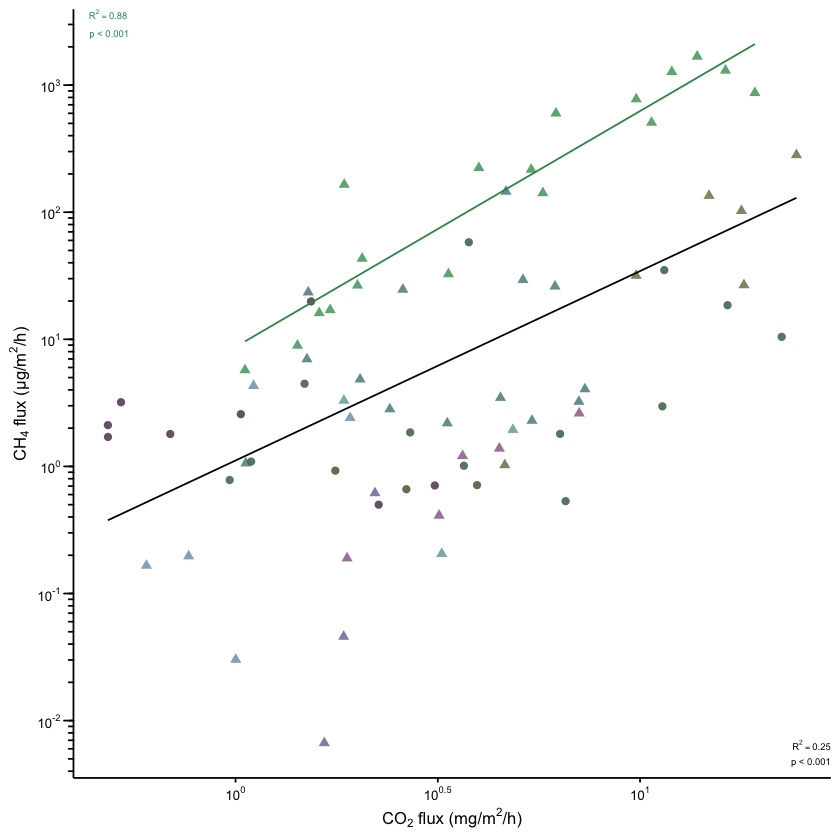

In [31]:
c <- ggplot(metaDB1, aes(CO2_mg_m2_h, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.75, aes(shape = EWcoastGroup)) +
  geom_smooth(data = subset(metaDB1, Location == "Mayberry"),
              aes(CO2_mg_m2_h, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "#2c9553") +
  geom_smooth(aes(CO2_mg_m2_h, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.88"), parse = TRUE, size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -3, label = "R^2 == 0.25"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -2, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = expression(""*CO[2]*" flux (mg/"*m^2*"/h)"), 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)")) +
  scale_colour_manual(values = site_colors$color) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))
c

In [21]:
d <- ggplot(metaDB, aes(Salinity.x, C, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(Salinity.x, C), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 1, label = "R^2 == 0.27"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = "Soil % C") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [22]:
e <- ggplot(metaDB, aes(C, NP, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NP), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.78"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = "Soil N:P") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [23]:
f <- ggplot(metaDB, aes(C, NH4_N, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NH4_N), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.65"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = expression(""*NH[4]^{"+"}*" (mg/g)")) +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

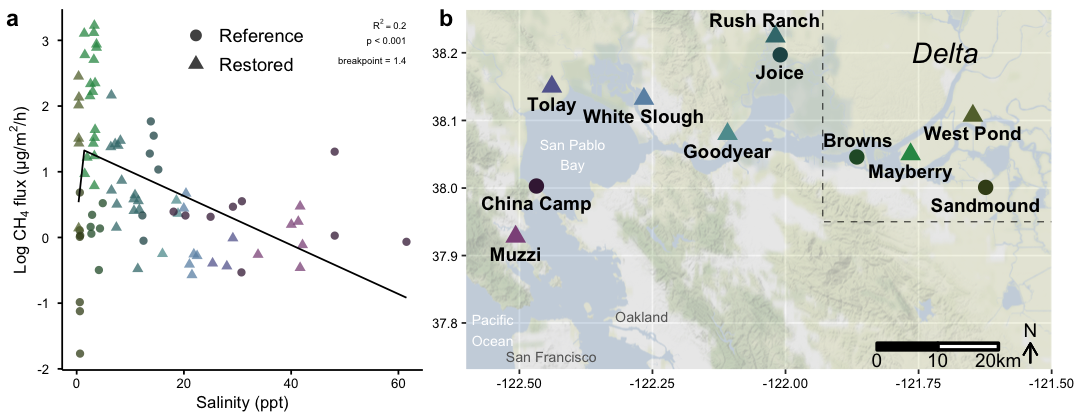

In [39]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
top <- plot_grid(a, b, ncol = 2, align = "h", rel_widths = c(1, 1.5), labels = c("a", "b"), axis = c("tblr"))
top

In [40]:
pdf("../figs/Figure1ab_segreg.pdf", width = 9, height = 3.5)
top
dev.off()

#pdf("../figs/Figure1ab_reg.pdf", width = 9, height = 3.5)
#top
#dev.off()

pdf 
  2

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



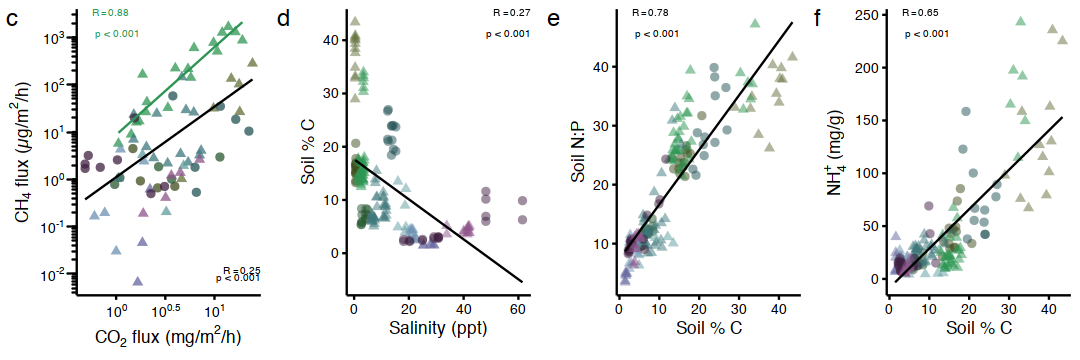

In [25]:
options(repr.plot.width = 9, repr.plot.height = 3)
bottom <- plot_grid(c, d, e, f, ncol = 4, align = "hv", axis = "trbl", labels = c("c", "d", "e", "f"))
bottom

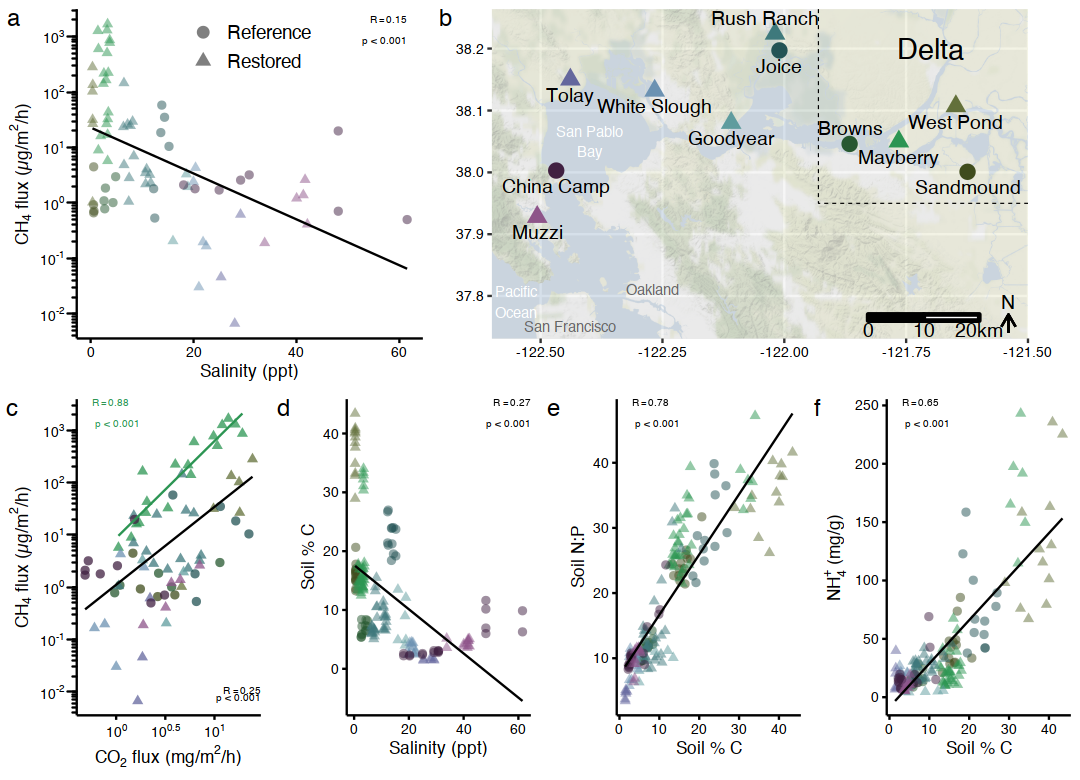

In [26]:
options(repr.plot.width = 9, repr.plot.height = 6.5)
figure1 <- plot_grid(top, bottom, ncol = 1)
figure1
# Difficult to make top row bigger without changing map - combine top and bottom manually

In [32]:
pdf("../figs/Figure1cdef_reg.pdf", width = 9, height = 2)
bottom
dev.off()

pdf 
  2

pdf 
  2

## Correlation Stats

In [33]:
print('Log CH4, Salinity')
m1 <- cor.test(metaDB1$Salinity.x, metaDB1$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('Log CH4, Log CO2')
m1 <- cor.test(metaDB1$CO2_logn1, metaDB1$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('Log CH4, Log CO2 - Mayberry Only')
m1 <- cor.test(Mayberry$CO2_logn1, Mayberry$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('C, Salinity')
m1 <- cor.test(metaDB$Salinity.x, metaDB$C)
round(m1$estimate, digits = 2)
m1$p.value

print('N:P, C')
m1 <- cor.test(metaDB$C, metaDB$NP)
round(m1$estimate, digits = 2)
m1$p.value

print('NH4, C')
m1 <- cor.test(metaDB$C, metaDB$NH4_N)
round(m1$estimate, digits = 2)
m1$p.value

[1] "Log CH4, Salinity"


cor 
-0.39

[1] 0.0002301674

[1] "Log CH4, Log CO2"


cor 
0.5

[1] 1.95701e-06

[1] "Log CH4, Log CO2 - Mayberry Only"


cor 
0.94

[1] 8.07447e-09

[1] "C, Salinity"


cor 
-0.52

[1] 3.835379e-13

[1] "N:P, C"


cor 
0.88

[1] 1.300358e-57

[1] "NH4, C"


cor 
0.81

[1] 1.227334e-40

## Figure

In [34]:
a <- ggplot(metaDB1, aes(Salinity.x, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 2, label = "r = -0.39"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)"),
       shape = NULL) +
  scale_colour_manual(values = site_colors$color) +
  scale_shape_manual(values = c(16, 17), labels = c("Reference", "Restored")) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  guides(colour = "none",
         shape = guide_legend(override.aes = list(size = 3))) +
  theme_classic() +
  theme(legend.position = c(0.5, 0.9),
        legend.text = element_text(size = 11, color = "black"), 
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

In [35]:
# Map with ggmap
adjust = c("RushRanch", "Browns")
coords1 <- subset(coords, Location %notin% adjust)
coords2 <- subset(coords, Location == "RushRanch")
coords3 <- subset(coords, Location == "Browns")

# Map
sfbay <- get_stamenmap(bbox = c(left = -122.6, 
                                bottom = 37.730988, 
                                right = -121.5, 
                                top = 38.263536),
                           zoom = 10, 
                           maptype = "terrain-background")
sfbay_attributes <- attributes(sfbay)
sfbay_transparent <- matrix(adjustcolor(sfbay, alpha.f = 0.4), nrow = nrow(sfbay))
attributes(sfbay_transparent) <- sfbay_attributes

path <- data.frame(x = c(-121.93, -121.93, -121.50),
                   y = c(38.263536, 37.95, 37.95))
b <- ggmap(sfbay_transparent) + # the base map
  geom_point(data = coords,
             aes(x = longitude, y = latitude, colour = Location, shape = Status), size =  4) +
  geom_text(data = coords1, aes(x = longitude, y = latitude - 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords2, aes(x = longitude - 0.02, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords3, aes(x = longitude + 0.002, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(aes(x = -121.7, y = 38.2, label = "Delta"), 
            colour = "black", size = 6, fontface = "italic", check_overlap = T) +
  geom_text(aes(x = -122.4, y = 38.05, label = "San Pablo\nBay"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.55, y = 37.79, label = "Pacific\nOcean"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.44, y = 37.75, label = "San Francisco"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.27, y = 37.81, label = "Oakland"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_path(data = path, aes(x = x, y = y), linetype = "dashed", size = 0.25) +
  geom_segment(aes(x = -121.54, xend = -121.54, y = 37.74, yend = 37.77), arrow = arrow(length = unit(0.30, "cm"))) +
  geom_text(aes(x = -121.54, y = 37.79, label = "N"), 
            colour = "black", size = 4, check_overlap = T) +
  scale_colour_manual(values = site_colors$color) +
  xlab(NULL) + 
  ylab(NULL) +
  scalebar(x.min = -122.6, 
           y.min = 37.76, 
           x.max = -121.6, 
           y.max = 38.26, 
           dist = 10, dist_unit = "km", height = 0.02, st.dist = 0.03, st.size = 4,
           transform = TRUE, model = "WGS84", location = "bottomright") +
  theme(legend.position = "none",
        plot.margin = unit(c(-0.6,0.6,-0.6,0), "cm"),
        axis.text = element_text(size = 8, color = "black"))

In [36]:
c <- ggplot(metaDB, aes(CO2_mg_m2_h, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.94"), size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -2, label = "r = 0.5"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = expression(""*CO[2]*" flux (mg/"*m^2*"/h)"), 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)")) +
  scale_colour_manual(values = site_colors$color) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

In [37]:
d <- ggplot(metaDB, aes(Salinity.x, C, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 1, label = "r = -0.52"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = "Soil % C") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [38]:
e <- ggplot(metaDB, aes(C, NP, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.88"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = "Soil N:P") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [39]:
f <- ggplot(metaDB, aes(C, NH4_N, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.81"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = expression(""*NH[4]^{"+"}*" (mg/g)")) +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


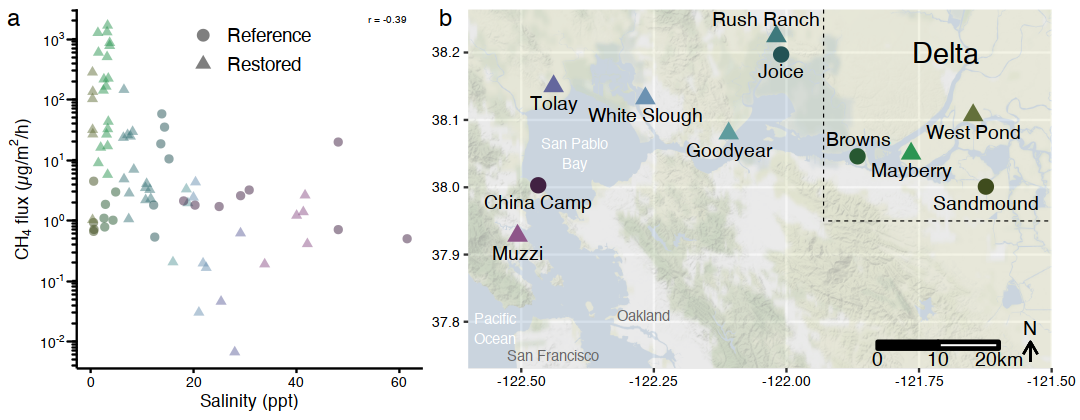

In [40]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
top <- plot_grid(a, b, ncol = 2, align = "h", rel_widths = c(1, 1.5), labels = c("a", "b"), axis = c("tblr"))
top

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


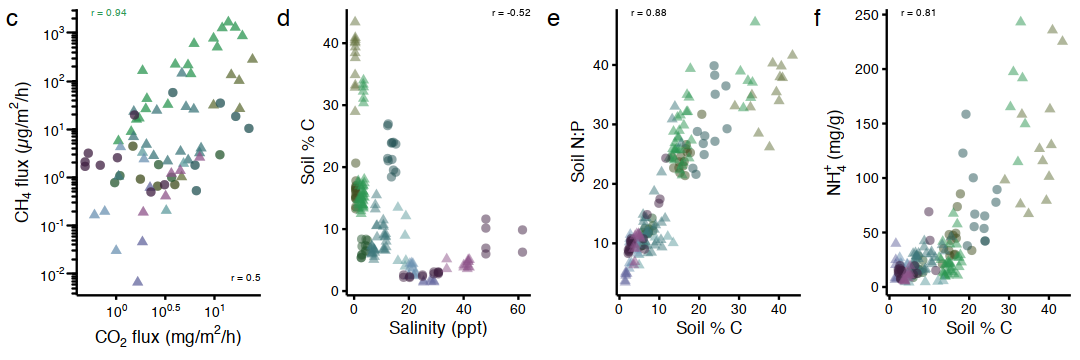

In [41]:
options(repr.plot.width = 9, repr.plot.height = 3)
bottom <- plot_grid(c, d, e, f, ncol = 4, align = "hv", axis = "trbl", labels = c("c", "d", "e", "f"))
bottom

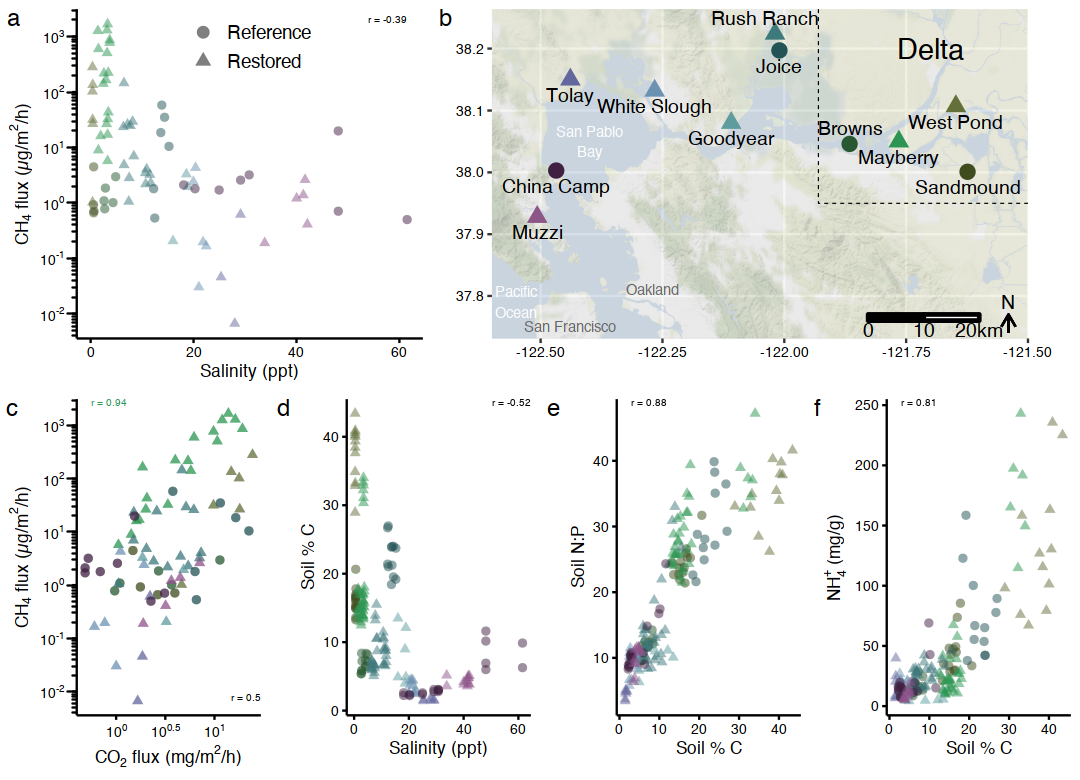

In [42]:
options(repr.plot.width = 9, repr.plot.height = 6.5)
figure1 <- plot_grid(top, bottom, ncol = 1)
figure1
# Difficult to make top row bigger without changing map - combine top and bottom manually

In [43]:
pdf("../figs/Figure1ab_cor.pdf", width = 9, height = 3.5)
top
dev.off()

pdf("../figs/Figure1cdef_cor.pdf", width = 9, height = 2)
bottom
dev.off()

pdf 
  2

pdf 
  2

# Polynomial stats

In [34]:
print('Log CH4, Salinity - Linear')
m1 <- lm(CH4_logn1 ~ Salinity.x, data = metaDB1)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Salinity - Polynomial')
m2 <- lm(CH4_logn1 ~ poly(Salinity.x, 2), data = metaDB1)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('Log CH4, Log CO2')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = metaDB1)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Log CO2 - Mayberry Only')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = subset(metaDB1, Location == "Mayberry"))
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('C, Salinity - Linear')
m1 <- lm(C ~ Salinity.x, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('C, Salinity - Polynomail')
m2 <- lm(C ~ poly(Salinity.x, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('N:P, C - Linear')
m1 <- lm(NP ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('N:P, C - Polynomial')
m2 <- lm(NP ~ poly(C, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

print('NH4, C - Linear')
m1 <- lm(NH4_N ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('NH4, C - Polynomial')
m2 <- lm(NH4_N ~ poly(C, 2), data = metaDB)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]

anova(m1, m2)

[1] "Log CH4, Salinity - Linear"


[1] 0.15

[1] 0.0002301674

[1] "Log CH4, Salinity - Polynomial"


[1] 0.18

[1] 0.0001977739

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,83,82.64004,NA,NA,NA,NA
2,82,79.73358,1,2.906461,2.989077,0.08759132


[1] "Log CH4, Log CO2"


[1] 0.25

[1] 1.95701e-06

[1] "Log CH4, Log CO2 - Mayberry Only"


[1] 0.88

[1] 8.07447e-09

[1] "C, Salinity - Linear"


[1] 0.27

[1] 3.835379e-13

[1] "C, Salinity - Polynomail"


[1] 0.39

[1] 6.761804e-15

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,12403.42,NA,NA,NA,NA
2,167,10438.75,1,1964.662,31.43082,8.390588e-08


[1] "N:P, C - Linear"


[1] 0.78

[1] 1.300358e-57

[1] "N:P, C - Polynomial"


[1] 0.86

[1] 1.196661e-69

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,4032.380,NA,NA,NA,NA
2,167,2655.759,1,1376.621,86.56499,7.479095e-17


[1] "NH4, C - Linear"


[1] 0.65

[1] 1.227334e-40

[1] "NH4, C - Polynomial"


[1] 0.71

[1] 1.751725e-44

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,124431.2,NA,NA,NA,NA
2,167,105339.9,1,19091.33,30.26632,1.392185e-07


### Note, polynomial model better for d, e, f but not a.
### Remake d, e, f with polynomial, updated text labels

In [32]:
d <- ggplot(metaDB, aes(Salinity.x, C, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(Salinity.x, C), method = "lm", formula = y ~ x + I(x^2), 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 1, label = "R^2 == 0.39"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = "Soil % C") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [33]:
e <- ggplot(metaDB, aes(C, NP, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NP), method = "lm", formula = y ~ x + I(x^2),
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.86"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = "Soil N:P") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [34]:
f <- ggplot(metaDB, aes(C, NH4_N, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NH4_N), method = "lm", formula = y ~ x + I(x^2), 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.71"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = expression(""*NH[4]^{"+"}*" (mg/g)")) +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


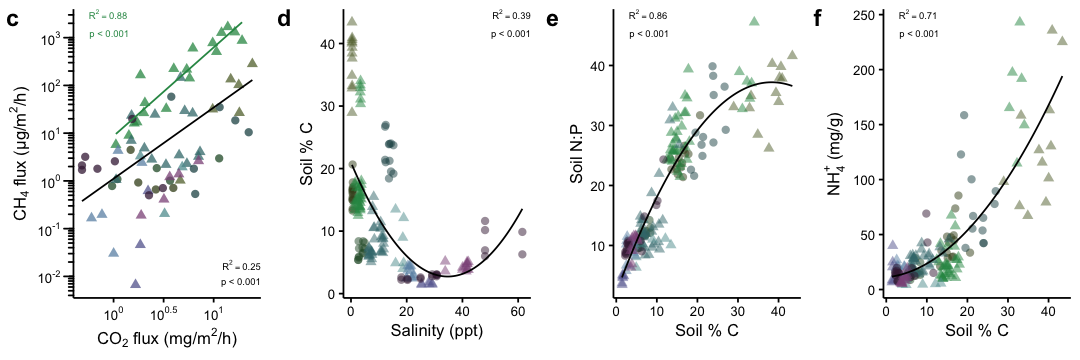

In [35]:
options(repr.plot.width = 9, repr.plot.height = 3)
bottom <- plot_grid(c, d, e, f, ncol = 4, align = "hv", axis = "trbl", labels = c("c", "d", "e", "f"))
bottom

In [39]:
pdf("../figs/Figure1cdef_poly.pdf", width = 9, height = 2)
bottom
dev.off()

pdf 
  2